In [ ]:
!pip install chemparse
!pip install pymatgen
import chemparse

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 34.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dftrain = pd.read_csv("training.csv", header=None)
dfval = pd.read_csv("validation.csv", header=None)
dftest = pd.read_csv("testing.csv", header=None)

train = dftrain.iloc[:, 3].tolist()
val = dfval.iloc[:, 3].tolist()
test = dftest.iloc[:, 3].tolist()

all = train
all.extend(val)
all.extend(test)
print(len(all))
data_max = max(all)
data_min = min(all)
print(data_max)
print(data_min)

1550
332.37
9.07


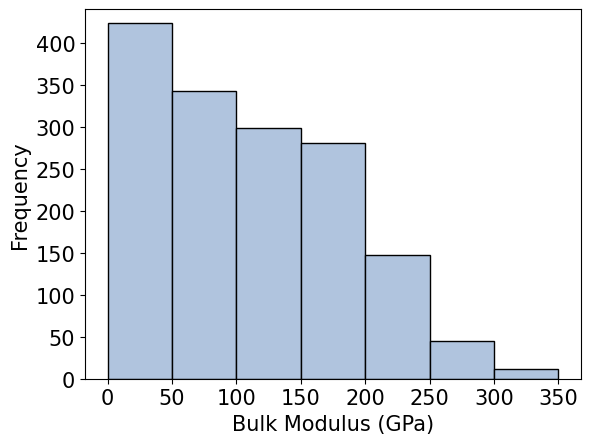

In [ ]:
plt.cla()
bin_width = 50
bins = np.arange(0, 351, bin_width)
plt.hist(all, bins=bins, edgecolor='black', color= 'lightsteelblue')
plt.xticks(bins, fontsize=15)# + 5)  # Adjust 5 for midpoints
plt.yticks(fontsize=15)# + 5)  # Adjust 5 for midpoints
plt.xlabel('Bulk Modulus (GPa)', fontsize =15)
plt.ylabel('Frequency', fontsize =15)
plt.savefig('freq_bulk.png',dpi=300, bbox_inches='tight')
plt.ylim(0, 440)
plt.show()

In [ ]:
dftrain = pd.read_csv("training_tote.csv", header=None)
dfval = pd.read_csv("validation_tote.csv", header=None)
dftest = pd.read_csv("testing_tote.csv", header=None)

train = dftrain.iloc[:, 3].tolist()
val = dfval.iloc[:, 3].tolist()
test = dftest.iloc[:, 3].tolist()

jid_train = dftrain.iloc[:, 0].tolist()
jid_val = dfval.iloc[:, 0].tolist()
jid_test = dftest.iloc[:, 0].tolist()

jids = jid_train
jids.extend(jid_val)
jids.extend(jid_test)
np.savetxt("jids.csv", jids, delimiter=",",fmt='%s')

all = train
all.extend(val)
all.extend(test)
print(len(all))
data_max = max(all)
data_min = min(all)
print(data_max)
print(data_min)

1550
-0.01
-8.69


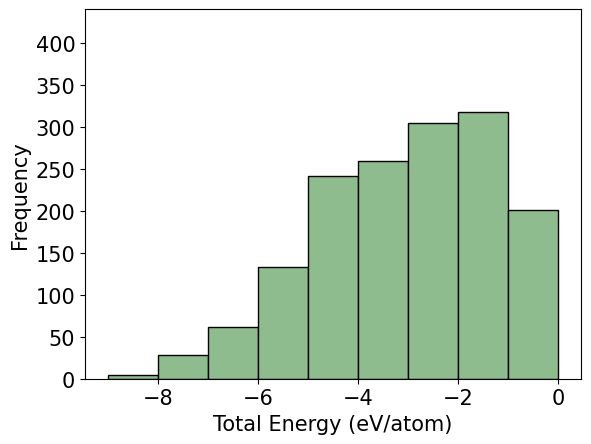

In [ ]:
plt.cla()
bin_width = 1
bins = np.arange(-9, 1, bin_width)
plt.xticks(fontsize=15)# + 5)  # Adjust 5 for midpoints
plt.yticks(fontsize=15)# + 5)  # Adjust 5 for midpoints
plt.hist(all, bins=bins, edgecolor='black', color = 'darkseagreen')
plt.xlabel('Total Energy (eV/atom)', fontsize =15)
plt.ylabel('Frequency', fontsize =15)
plt.ylim(0, 440)
#plt.xticks(bins)# + 5)  # Adjust 5 for midpoints
plt.savefig('freq_tote.png',dpi=300, bbox_inches='tight')
plt.show()

Index(['Unnamed: 0', 'JID', 'Formula', 'SPG', 'Bulk', 'Shear', 'Poisson',
       'MagMom', 'Bandgap', 'TotalE', 'Density', 'ehull', 'C11', 'C12', 'C44',
       'Elastic'],
      dtype='object')
1550
SC: 649
FCC: 901
BCC: 0
(array(['216', '221', '225'], dtype='<U3'), array([310, 649, 591]))
Elements
1550
62
2


(array([ 15.,   0., 494.,   0.,   0., 947.,   0.,  93.,   0.,   1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

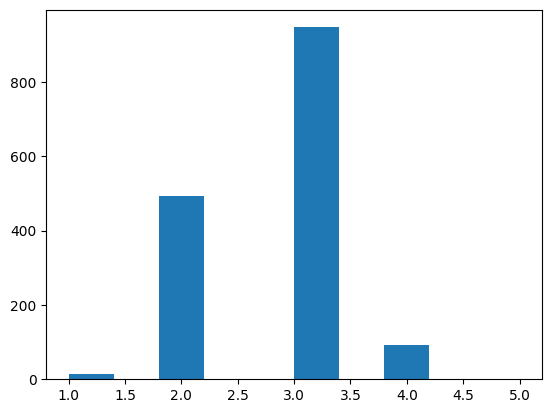

In [ ]:
dftrain = pd.read_csv("training_tote.csv", header=None)
dfval = pd.read_csv("validation_tote.csv", header=None)
dftest = pd.read_csv("testing_tote.csv", header=None)
df=pd.read_csv("nfiles.csv")

print(df.keys())
spgs=df['SPG'].to_numpy()
mat_ids = df['JID'].to_numpy()
forms = df['Formula'].to_numpy()

sc_spgs  = ["198","208","215","221","224","200","205","212","213","218","223"]
fcc_spgs = ["216","225","227"]
bcc_spgs = ["199","204","206","217","220","229"]

train = dftrain.iloc[:, 0].tolist()
val = dfval.iloc[:, 0].tolist()
test = dftest.iloc[:, 0].tolist()

all = train
all.extend(val)
all.extend(test)
print(len(all))
all_spg=[]
all_ele=[]
all_lene =[]

sc = 0
fcc = 0
bcc = 0

for jid in all:
    loc=np.where(mat_ids==jid)[0][0]
    spg=str(spgs[loc])
    form=forms[loc]
    parsedform=chemparse.parse_formula(form)
    eleu=[]
    for e in parsedform:
        eleu.append(e)
    all_ele.extend(eleu)
    all_lene.append(len(eleu))
    all_spg.append(spg)
    if spg in sc_spgs:
        sc+=1
    elif spg in fcc_spgs:
        fcc+=1
    elif spg in bcc_spgs:
        bcc+=1
    else:
        print(spg)
print("SC:", sc)
print("FCC:",fcc)
print("BCC:",bcc)
unique = np.unique(all_spg, return_counts=True)
print(unique)


Elements
1550
62
(array([1, 2, 3, 4, 5]), array([ 15, 494, 947,  93,   1]))


(array([ 15.,   0., 494.,   0.,   0., 947.,   0.,  93.,   0.,   1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

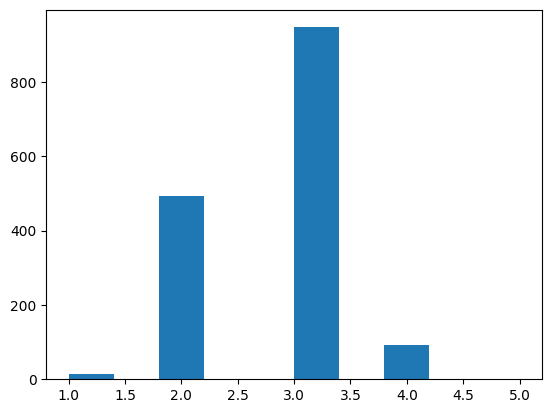

In [ ]:
print("Elements")
print(len(all_lene))
print(len(np.unique(all_ele)))
print(np.unique(all_lene, return_counts=True))
plt.hist(all_lene)

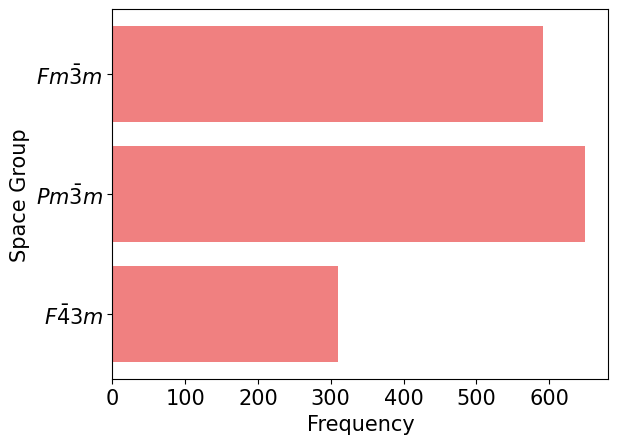

In [ ]:
categories, values = unique
categories = [r'$F\bar{4}3m$',r'$Pm\bar{3}m$',r'$Fm\bar{3}m$']
plt.barh(categories, values, color = 'lightcoral')
plt.xlabel('Frequency', fontsize =15)
plt.ylabel('Space Group', fontsize =15)
plt.xticks(fontsize=15)# + 5)  # Adjust 5 for midpoints
plt.yticks(fontsize=15)# + 5
plt.savefig('freq_spg.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
parsedform=chemparse.parse_formula(form)
eleu=[]
for e in parsedform:
    eleu.append(e)